In [15]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [16]:
names = open('names.txt', 'r').read().splitlines()
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [17]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [18]:
ctoi = {c:i for i, c in enumerate(['.'] + sorted(list(set(''.join(names)))))}
itoc = {i:c for c, i in ctoi.items()}

In [19]:
for name in names:
    for a, b in zip('.' + name, name + '.'):
        N[ctoi[a], ctoi[b]] += 1

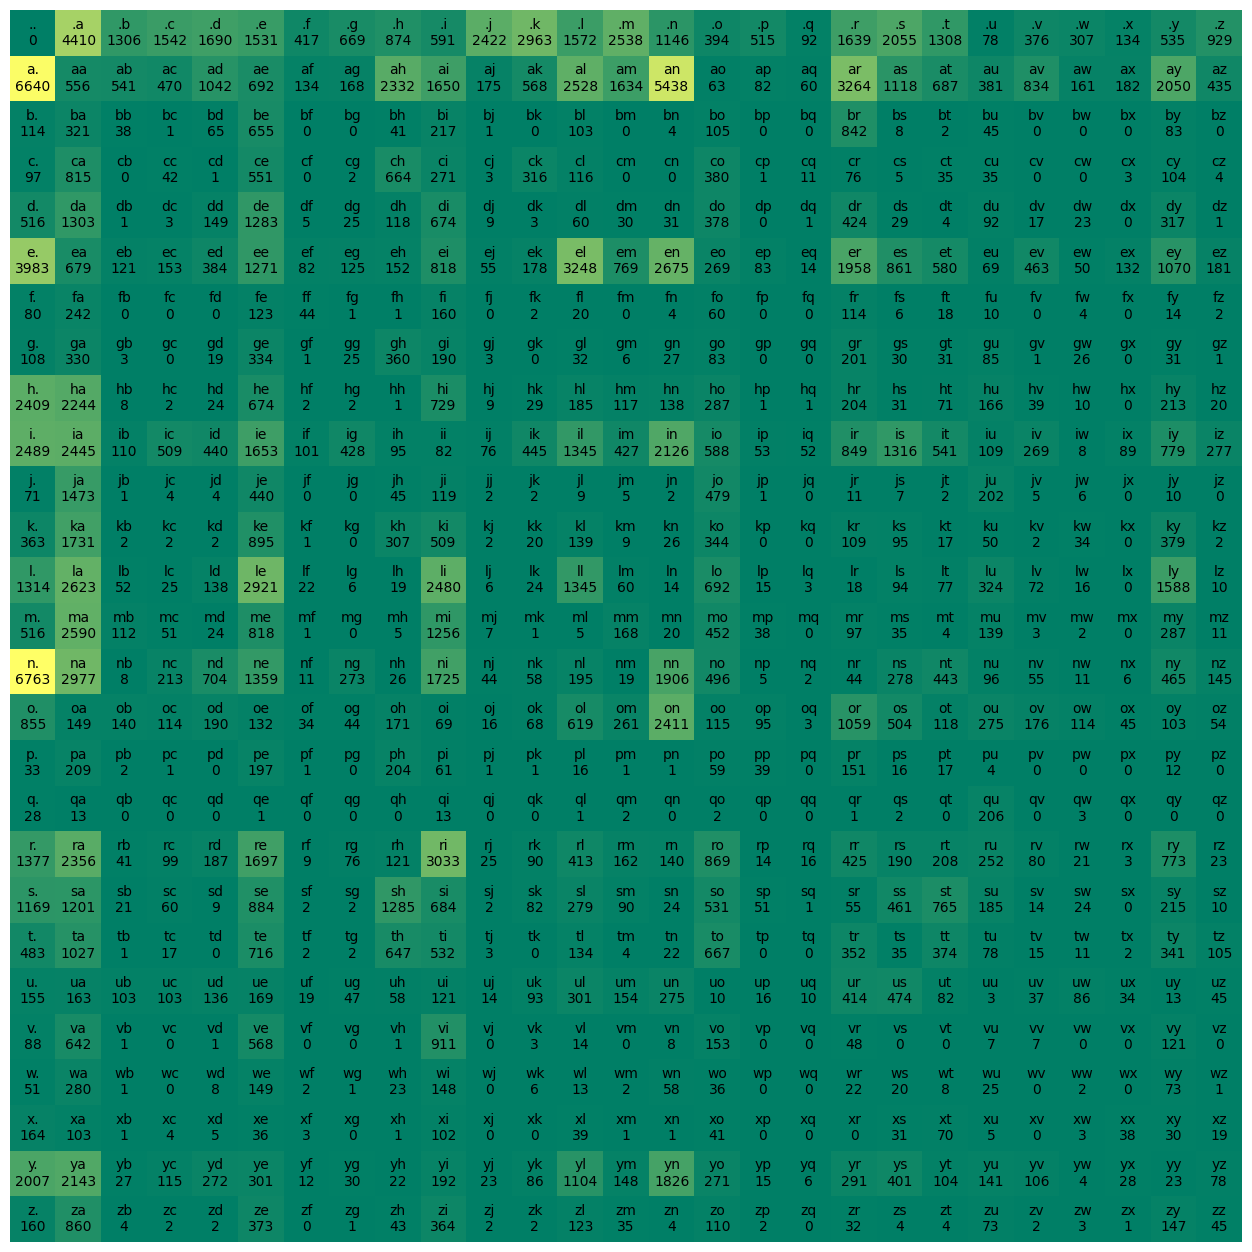

In [20]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='summer')
labels = [[plt.text(j, i, f"{itoc[i] + itoc[j]}\n{N[i, j]}", ha='center', va = 'center') for j in range(27)] for i in range(27)]
plt.axis('off')
plt.show()

In [21]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [22]:
def generateWord(N):
    c = '.'
    word = ''
    while True:
        i = ctoi[c]
        pred = torch.multinomial(P[i, :], num_samples=1, replacement=True).item()
        if pred == 0: break
        c = itoc[pred]; word += c
    return word
for i in range(5):
    print(generateWord(N))

cyh
alitzy
jey
jeluppl
ourakh


In [23]:
log_likelihood = 0.0
n = 0
for name in names:
    for a, b in zip('.' + name, name + '.'):
        ix1, ix2 = ctoi[a], ctoi[b]
        prob = P[ix1, ix2]
        logprob = prob.log()
        log_likelihood += logprob
        n += 1
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')


log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [24]:
xs = []
ys = []

for name in names:
    for a, b in zip('.' + name, name + '.'):
        idx1, idx2 = ctoi[a], ctoi[b]
        xs.append(idx1); ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
num

228146

In [25]:
W = torch.randn((27, 27), requires_grad=True)

In [26]:
for k in range(100):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdim=True)
    loss = -prob[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() # Smoothening
    print(f"{k}: {loss.item()}")
    W.grad = None
    loss.backward()

    W.data += -50*W.grad

0: 3.708162784576416
1: 3.350393533706665
2: 3.1391830444335938
3: 3.0088841915130615
4: 2.9153635501861572
5: 2.8461427688598633
6: 2.7945868968963623
7: 2.755455732345581
8: 2.724923849105835
9: 2.7003982067108154
10: 2.6801626682281494
11: 2.6630945205688477
12: 2.6484484672546387
13: 2.6357126235961914
14: 2.6245195865631104
15: 2.614593267440796
16: 2.605722427368164
17: 2.5977423191070557
18: 2.5905239582061768
19: 2.5839641094207764
20: 2.5779802799224854
21: 2.572504997253418
22: 2.567483901977539
23: 2.5628693103790283
24: 2.5586230754852295
25: 2.5547094345092773
26: 2.551098585128784
27: 2.5477633476257324
28: 2.5446786880493164
29: 2.5418217182159424
30: 2.5391716957092285
31: 2.536709785461426
32: 2.5344178676605225
33: 2.532280683517456
34: 2.5302839279174805
35: 2.528414487838745
36: 2.526660203933716
37: 2.5250110626220703
38: 2.52345871925354
39: 2.521993637084961
40: 2.52060866355896
41: 2.5192978382110596
42: 2.518054723739624
43: 2.5168745517730713
44: 2.51575231552

In [27]:
for i in range(5):
    idx = 0
    while True:
        xenc = F.one_hot(torch.tensor([idx]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        prob = counts / counts.sum(1, keepdim=True)
        idx = torch.multinomial(prob, num_samples=1, replacement=True)
        if idx == 0: break
        print(itoc[idx.item()], end='')
    print()

loodenarthberlba
kevyng
kes
ali
l
